<a href="https://colab.research.google.com/github/Scaicedo46/Solid-engine/blob/master/Sleep_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing Sleep Data Using Various Clustering Methods

In this project I will be using clustering to gain insight on how sleep data subjects fall into groups. The dataframe is made of subjects that took part in a sleep study using caps that provided soundwaves to assist with sleeping. Over the course of approximately 31 days subjects patterns of sleep were recorded and surveys were taken describing their sleep.

## Importing Main DF

First after importing the data, I placed the initial excel file into pickle files since it had over 125 sheets. It allows for faster loading times of individual sheets!

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt 
import openpyxl
import pickle

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
dict_XL = pickle.load(open( "/content/drive/My Drive/Colab Notebooks/pickles/dictSave_0.p", "rb" ))
main_df  = pd.DataFrame.from_dict(dict_XL)
header = main_df.iloc[0]
main_df = main_df[1:] 
main_df.columns = header
main_df.head(3)

,ID,Change in sleep quality—PSQI,NaN,Epworth sleep quality—average first 4 Epworths,Groningen sleep quality—average first 4 Groningens,PSQI sleep quality—beginning,Both PSQI surveys completed,Number of nights of SSB data (excluding first 4 nights),SSB data—first 4 nights,Number of self-reported nights of sleep (excluding first 4 nights),Self-reported SSB uses—first 4 days,SSB nights of data TOTAL,SSB nights of data,Self-reported SSB use TOTAL,Number of self-reported SSB uses,ID,Age,Gender,OS,Beginning PSQI Total,Ending PSQI Total,Survey Day,Raw Sleep Id,Time To Bed,Time Awake,Sleep Duration,Self-Reported Sleep Quality Rating (entered into app),Sleep Score (calculated by SSB app),"Did you wear SSB? (self, not app, reported)",Epworth,Groningen,Duration of sleep begin,Sleep disturbance begin,Sleep latency begin,Day dysfunction due to sleepiness begin,Sleep efficiency begin,Overall sleep quality begin,Need medication to sleep begin,Duration of sleep end,Sleep disturbance end,Sleep latency end,Day dysfunction due to sleepiness end,Sleep efficiency end,Overall sleep quality end,Need medication to sleep end,Day Shift or Night Shift?,Epworth slope,Groningen slope,Epworth slope (people with first 4 Epworth average > 10),Groningen slope (people with first 4 Groningen average > 5)
1,2417,no ending score,NaN,5,2.5,poor sleeper,no,NaN,1,NaN,1,NaN,1,NaN,1,2417,35 to 44,Female,Android,7,NaN,DAY 1,66323,2/12/2019 6:03:09 PM,2/12/2019 9:20:39 PM,3.29,3,49,Yes,5,3,2,1,0,0,3,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Night Shift,-0.0217,0.0029,NaN,NaN
2,2417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1,NaN,1,NaN,1,2417,35 to 44,Female,Android,7,NaN,DAY 2,66539,2/13/2019 6:23:32 PM,2/13/2019 9:20:47 PM,2.95,3,49,Yes,5,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Night Shift,NaN,NaN,NaN,NaN
3,2417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1,NaN,1,NaN,1,2417,35 to 44,Female,Android,7,NaN,DAY 3,66816,2/14/2019 6:12:23 PM,2/14/2019 10:22:53 PM,4.18,3,NaN,Yes,5,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Night Shift,NaN,NaN,NaN,NaN


Looking my dataframe it has duplicate 'ID' columns so I am going to remove one to prevent confusion later on.

In [0]:
main_df = main_df.loc[:,~main_df.columns.duplicated()]
print('Number of duplicated columns',':',main_df.columns.duplicated().any().sum())
main_df.head()

Number of duplicated columns : 0


,ID,Change in sleep quality—PSQI,NaN,Epworth sleep quality—average first 4 Epworths,Groningen sleep quality—average first 4 Groningens,PSQI sleep quality—beginning,Both PSQI surveys completed,Number of nights of SSB data (excluding first 4 nights),SSB data—first 4 nights,Number of self-reported nights of sleep (excluding first 4 nights),Self-reported SSB uses—first 4 days,SSB nights of data TOTAL,SSB nights of data,Self-reported SSB use TOTAL,Number of self-reported SSB uses,Age,Gender,OS,Beginning PSQI Total,Ending PSQI Total,Survey Day,Raw Sleep Id,Time To Bed,Time Awake,Sleep Duration,Self-Reported Sleep Quality Rating (entered into app),Sleep Score (calculated by SSB app),"Did you wear SSB? (self, not app, reported)",Epworth,Groningen,Duration of sleep begin,Sleep disturbance begin,Sleep latency begin,Day dysfunction due to sleepiness begin,Sleep efficiency begin,Overall sleep quality begin,Need medication to sleep begin,Duration of sleep end,Sleep disturbance end,Sleep latency end,Day dysfunction due to sleepiness end,Sleep efficiency end,Overall sleep quality end,Need medication to sleep end,Day Shift or Night Shift?,Epworth slope,Groningen slope,Epworth slope (people with first 4 Epworth average > 10),Groningen slope (people with first 4 Groningen average > 5)
1,2417,no ending score,NaN,5,2.5,poor sleeper,no,NaN,1,NaN,1,NaN,1,NaN,1,35 to 44,Female,Android,7,NaN,DAY 1,66323,2/12/2019 6:03:09 PM,2/12/2019 9:20:39 PM,3.29,3,49,Yes,5,3,2,1,0,0,3,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Night Shift,-0.0217,0.0029,NaN,NaN
2,2417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1,NaN,1,NaN,1,35 to 44,Female,Android,7,NaN,DAY 2,66539,2/13/2019 6:23:32 PM,2/13/2019 9:20:47 PM,2.95,3,49,Yes,5,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Night Shift,NaN,NaN,NaN,NaN
3,2417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1,NaN,1,NaN,1,35 to 44,Female,Android,7,NaN,DAY 3,66816,2/14/2019 6:12:23 PM,2/14/2019 10:22:53 PM,4.18,3,NaN,Yes,5,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Night Shift,NaN,NaN,NaN,NaN
4,2417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DAY 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DAY 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Supporting data exploratory analysis

The dataframe has mutiple nights reported. I want the 1st survey day to get the proper amount of genders and age groups for my exploratory data analysis.

In [0]:
main_df1 = main_df[main_df['Survey Day']=='DAY 1']
print('Shape of old dataframe' ,':',main_df.shape)
print('Shape of new dataframe' ,':',main_df1.shape)
main_df1.head()

Shape of old dataframe : (2773, 49)
Shape of new dataframe : (84, 49)


,ID,Change in sleep quality—PSQI,NaN,Epworth sleep quality—average first 4 Epworths,Groningen sleep quality—average first 4 Groningens,PSQI sleep quality—beginning,Both PSQI surveys completed,Number of nights of SSB data (excluding first 4 nights),SSB data—first 4 nights,Number of self-reported nights of sleep (excluding first 4 nights),Self-reported SSB uses—first 4 days,SSB nights of data TOTAL,SSB nights of data,Self-reported SSB use TOTAL,Number of self-reported SSB uses,Age,Gender,OS,Beginning PSQI Total,Ending PSQI Total,Survey Day,Raw Sleep Id,Time To Bed,Time Awake,Sleep Duration,Self-Reported Sleep Quality Rating (entered into app),Sleep Score (calculated by SSB app),"Did you wear SSB? (self, not app, reported)",Epworth,Groningen,Duration of sleep begin,Sleep disturbance begin,Sleep latency begin,Day dysfunction due to sleepiness begin,Sleep efficiency begin,Overall sleep quality begin,Need medication to sleep begin,Duration of sleep end,Sleep disturbance end,Sleep latency end,Day dysfunction due to sleepiness end,Sleep efficiency end,Overall sleep quality end,Need medication to sleep end,Day Shift or Night Shift?,Epworth slope,Groningen slope,Epworth slope (people with first 4 Epworth average > 10),Groningen slope (people with first 4 Groningen average > 5)
1,2417,no ending score,NaN,5,2.5,poor sleeper,no,NaN,1,NaN,1,NaN,1,NaN,1,35 to 44,Female,Android,7,NaN,DAY 1,66323,2/12/2019 6:03:09 PM,2/12/2019 9:20:39 PM,3.29,3,49,Yes,5,3,2,1,0,0,3,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Night Shift,-0.0217,0.0029,NaN,NaN
34,2762,-1,NaN,11.75,11,poor sleeper,2762,NaN,0,NaN,1,NaN,NaN,NaN,1,45 to 54,Male,iOS (Apple),7,6,DAY 1,,NaN,NaN,NaN,NaN,NaN,Yes,12,13,1,1,2,1,0,2,0,1,1,1,1,1,1,0,Day Shift,-0.223,-0.2549,-0.223,-0.2549
67,2830,0,NaN,8,3.5,good sleeper,2830,NaN,0,NaN,0,NaN,NaN,NaN,0,25 to 34,Male,Android,5,5,DAY 1,NaN,NaN,NaN,NaN,NaN,NaN,No,11,8,0,2,0,2,0,1,0,2,0,2,0,1,0,5,Day Shift,0.0035,0.03,NaN,NaN
100,2831,-1,NaN,10.5,3.25,poor sleeper,2831,NaN,0,NaN,0,NaN,NaN,NaN,0,35 to 44,Male,Android,8,7,DAY 1,NaN,NaN,NaN,NaN,NaN,NaN,No,10,2,1,1,2,1,2,1,0,1,1,2,1,1,1,0,Day Shift,0.0158,-0.0699,0.0158,NaN
133,2832,-2,NaN,12,5,poor sleeper,2832,NaN,0,NaN,0,NaN,NaN,NaN,0,35 to 44,Male,iOS (Apple),7,5,DAY 1,,NaN,NaN,NaN,NaN,NaN,No,13,2,2,1,1,2,0,1,0,2,1,1,0,0,1,0,Day Shift,0.0781,-0.0297,0.0781,NaN


Now we will take a look at the supporting data and get an overview of the ages and genders distributions in our sleep data.

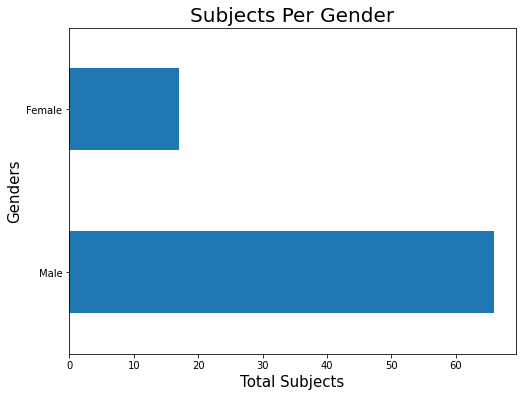

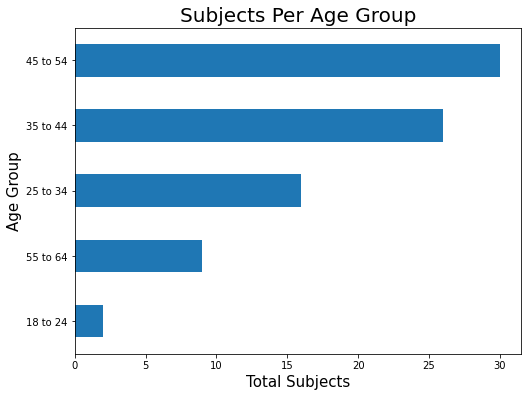

In [0]:
plt.figure(figsize=[8,6])
main_df1.Gender.value_counts().plot(kind='barh')
plt.xlabel('Total Subjects', fontsize=15)
plt.ylabel('Genders', fontsize=15)
plt.title('Subjects Per Gender', fontsize=20);
plt.figure(figsize=[8,6])
main_df1.Age.value_counts(ascending=True).plot(kind='barh')
plt.xlabel('Total Subjects', fontsize=15)
plt.ylabel('Age Group', fontsize=15)
plt.title('Subjects Per Age Group', fontsize=20);

The graph above shows that the study leaned towards subjects over the age of 35 and examined mostly male subjects. Age groups 18 to 24 and females were the most under represented.

## Gender exploratory data anaylsis 

To get a better look at the distribution of genders I will split our main dataframe into male and female dataframes

In [0]:
male_df = main_df1[main_df1['Gender']=='Male'] 
female_df = main_df1[main_df1['Gender']=='Female'] 

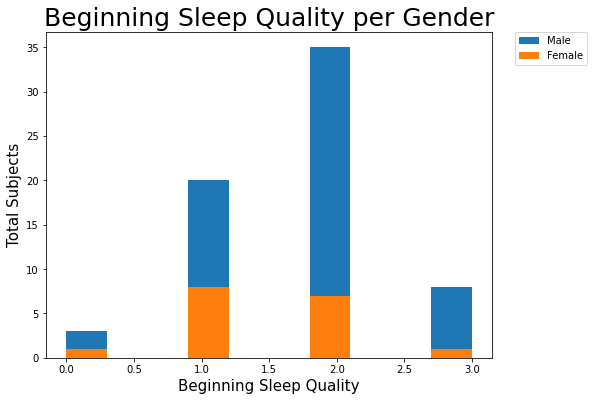

In [0]:
plt.figure(figsize=[8,6])
plt.hist('Overall sleep quality begin',data=male_df, label='Male')
plt.hist('Overall sleep quality begin',data=female_df, label='Female')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.ylabel('Total Subjects', fontsize=15)
plt.xlabel('Beginning Sleep Quality', fontsize=15)
plt.title('Beginning Sleep Quality per Gender',fontsize=25);

This graph above shows the beginning sleep quality across males and females. The scale goes from 0 being the best sleep and 3 being the worst sleep. It shows that most subjects reported a overall worse sleep on survey day 1. 

## Exploratory Data Analysis 

To get an idea of how the data looks from a user I selected on to see how we can use the data given.

In [0]:
df_dict = pickle.load(open( "/content/drive/My Drive/Colab Notebooks/pickles/dictSave_2412.p", "rb" ))
df = pd.DataFrame.from_dict(df_dict)
df.head()

,rawSleepID,proSleepID,proTime,proOrientation,proSleepLvl,proHatOffLine
0,49698,49712,0,11,100.0,NaN
1,49698,49712,15,11,99.9,NaN
2,49698,49712,30,11,99.7,NaN
3,49698,49712,45,11,99.3,NaN
4,49698,49712,60,11,98.8,NaN


So the user dataframe above shows that we have 6 categories.  
**rawSleepID**-	The Id for the raw sleep data   
**proSleepID**-  The Id for the night the raw sleep data was taken   
**proTime**	- The array of sleep time in 15 second intervals   
**proOrientation**-	Orientation values through the night ( Down = 1 Left = 2 Up = 3 Right = 4 Standing = 5 Headstand = 6)  
**proSleepLvl**-	Sleep Level values 0 - 100, 0 being in the deepest sleep 100 being awake.   
**proHatOffLine**- Device recording is off or giving no EEG values.

Here is a example graph of a single user in a dataframe and his sleep level throguhout the night

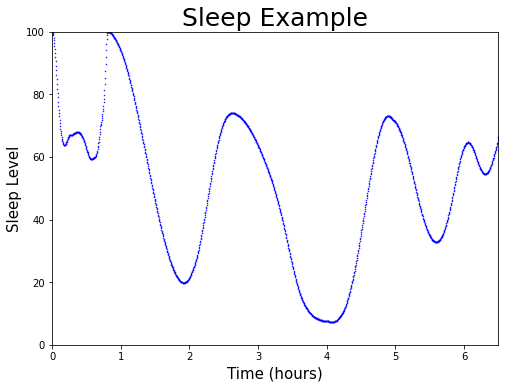

In [0]:
uniIdx = df.proSleepID.unique()
uniDF  = df.loc[df['proSleepID'] == uniIdx[0]]

name = 'SleepExample'

fig = plt.figure(figsize=[8,6])
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title('Sleep Example',fontsize=25)
ax.set_xlabel('Time (hours)',fontsize=15)
ax.set_ylabel('Sleep Level',fontsize=15)
ax.axis([0, 6.5, 0, 100])
plt.plot(uniDF['proTime']/3600,uniDF['proSleepLvl'], 'b.', markersize=1);

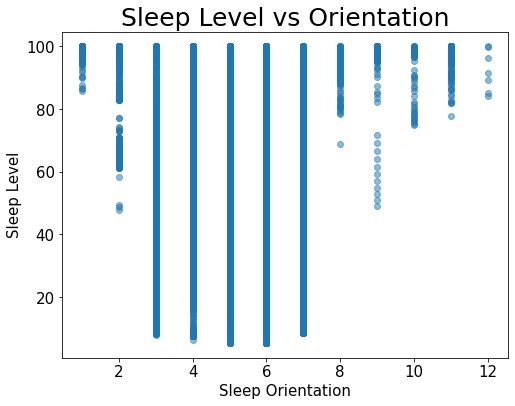

In [0]:
plt.figure(figsize=[8,6])
plt.scatter(df['proOrientation'],df['proSleepLvl'], alpha=0.5);
plt.ylabel('Sleep Level', fontsize=15)
plt.xlabel('Sleep Orientation', fontsize=15)
plt.title('Sleep Level vs Orientation', fontsize=25)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

The graph above shows the orientation sleep orientation to sleep level of user 2412 throughout the study. 100 being awake and 0 being deepest type of sleep. 

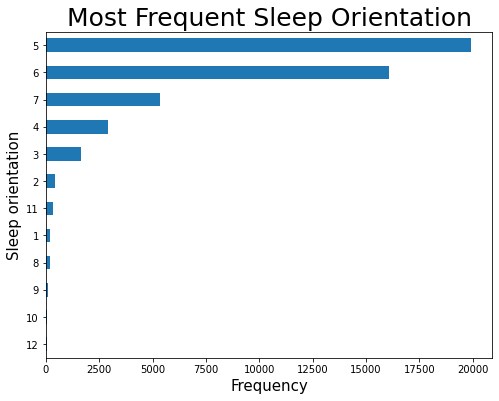

In [0]:
df['proOrientation'].value_counts(ascending=True).plot(kind='barh',figsize=(8,6))
plt.xlabel('Frequency', fontsize=15)
plt.ylabel('Sleep Orientation', fontsize=15)
plt.title('Most Frequent Sleep Orientation',fontsize=25);

In the graph above shows user 2412 favored sleep orientation throughout the study, which is number 5 (Headstand)

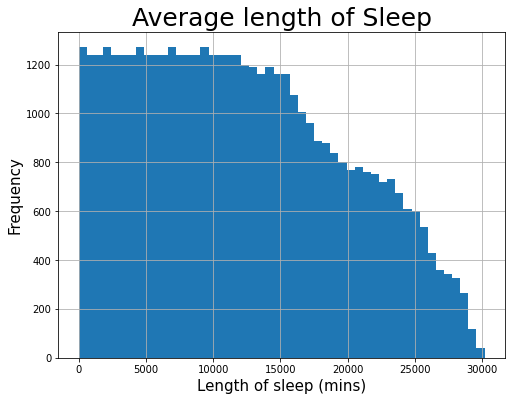

In [0]:
df.hist(figsize=[8,6], bins=50, ylabelsize=10, xlabelsize=10, column=['proTime'])
plt.ylabel('Frequency', fontsize=15)
plt.xlabel('Length of sleep (mins)', fontsize=15)
plt.title('Average length of Sleep',fontsize=25)
plt.show();

In the graph above shows User 2412 frequency of length of sleep throughout the study .

## Average Minutes Below Level function

Now I will create functions to loop over my user_id's so I can attempt to classify the subjects into different clusters

In [0]:
df1_dict = pickle.load(open( "/content/drive/My Drive/Colab Notebooks/pickles/dictSave_2417.p", "rb" ))
df1 = pd.DataFrame.from_dict(df1_dict)
print(df1.head())
print(df1.dtypes)

   rawSleepID  proSleepID  proTime  proOrientation  proSleepLvl  proHatOffLine
0       66879       66893        0               5        100.0            NaN
1       66879       66893       15               5        100.0            NaN
2       66879       66893       30               5         99.8            NaN
3       66879       66893       45               5         99.6            NaN
4       66879       66893       60               5         99.3            NaN
rawSleepID          int64
proSleepID          int64
proTime             int64
proOrientation      int64
proSleepLvl       float64
proHatOffLine     float64
dtype: object


This function gives me how long a person sleep in mins so I could possibly classify good and bad sleepers by if we add another dimension like length of sleep.

In [0]:
def AvgMinBelowLvl(psl_column,sleep_lvl,number_of_nights):
  ds_time = 0
  for lvl in psl_column.iteritems():
    if pd.isnull(lvl):
      continue
    else:
      if lvl[1] < sleep_lvl:
        ds_time += .25
  return ds_time/number_of_nights   

Adding the AvgMinsBelowLvl 100 gives me the fraction of time under a specified level.

In [0]:
df1_dsTime = AvgMinBelowLvl(df1['proSleepLvl'],60,32)/AvgMinBelowLvl(df1['proSleepLvl'],100,32)

Here I will create my list of user_id's I want to loop over

In [0]:
user_idx1 = list(main_df1.ID.unique())
print(user_idx1)

[2417, 2762, 2830, 2831, 2832, 2833, 2834, 2835, 2836, 2838, 2842, 2844, 2845, 2846, 2848, 2850, 2852, 2853, 2856, 2857, 2859, 2862, 2863, 2864, 2866, 2867, 2868, 2870, 2871, 2872, 2874, 2878, 2880, 2886, 2887, 2889, 2890, 2891, 2892, 2893, 2894, 2899, 2905, 2909, 2910, 2911, 2912, 2913, 2914, 2915, 2919, 2926, 2927, 2928, 2929, 2932, 2934, 2935, 2937, 2939, 2940, 2942, 2944, 2946, 2948, 2955, 2956, 2959, 2960, 2961, 2963, 2967, 2971, 2974, 2975, 2980, 2985, 2987, 2988, 2943, 2992, 2994, 3001, 2412]


In [0]:
user_idx1.remove(2417)
user_idx1.remove(2833)
user_idx1.remove(2845)
user_idx1.remove(2844)
user_idx1.remove(3001)
user_idx1.remove(2988)

In [0]:
print(user_idx1)

[2762, 2830, 2831, 2832, 2834, 2835, 2836, 2838, 2842, 2846, 2848, 2850, 2852, 2853, 2856, 2857, 2859, 2862, 2863, 2864, 2866, 2867, 2868, 2870, 2871, 2872, 2874, 2878, 2880, 2886, 2887, 2889, 2890, 2891, 2892, 2893, 2894, 2899, 2905, 2909, 2910, 2911, 2912, 2913, 2914, 2915, 2919, 2926, 2927, 2928, 2929, 2932, 2934, 2935, 2937, 2939, 2940, 2942, 2944, 2946, 2948, 2955, 2956, 2959, 2960, 2961, 2963, 2967, 2971, 2974, 2975, 2980, 2985, 2987, 2943, 2992, 2994, 2412]


Now I want to take my function 'deeper_sleep' and loop over all of my files in my pickle folder

In [0]:
data= []
for x in user_idx1:
  cols = ['Mins Below Sleep Lvl 60']
  dict_user = pickle.load(open( "/content/drive/My Drive/Colab Notebooks/pickles/dictSave_"+str(x)+".p", "rb" ))
  df_user = pd.DataFrame.from_dict(dict_user)
  results = AvgMinBelowLvl(df_user['proSleepLvl'],60,31)/AvgMinBelowLvl(df1['proSleepLvl'],100,31)
  data.append(results)

deep_results = pd.DataFrame(data, columns=cols)
print(deep_results)

    Mins Below Sleep Lvl 60
0                  0.805462
1                  0.552985
2                  0.868158
3                  0.908442
4                  0.752747
..                      ...
73                 0.497532
74                 0.385976
75                 1.283681
76                 0.522826
77                 0.858141

[78 rows x 1 columns]


In [0]:
user_df = pd.DataFrame(user_idx1, columns=['User_ID'])
deep_results1 = pd.concat([user_df,deep_results], axis=1)

In [0]:
deep_results1.head()

,User_ID,Mins Below Sleep Lvl 60
0,2762,0.805462
1,2830,0.552985
2,2831,0.868158
3,2832,0.908442
4,2834,0.752747


## Average Length Of Sleep Function

Here with this function I want to get the full lengeth of sleep / the number of unique rawsleep ids

In [0]:
df2_dict = pickle.load(open( "/content/drive/My Drive/Colab Notebooks/pickles/dictSave_2891.p", "rb" ))
df2 = pd.DataFrame.from_dict(df2_dict)
print(df2.head())
print(df2.dtypes)

   rawSleepID  proSleepID  proTime  proOrientation  proSleepLvl  proHatOffLine
0       65710       65724        0               8        100.0            NaN
1       65710       65724       15               8        100.0            NaN
2       65710       65724       30               1        100.0            NaN
3       65710       65724       45               1         99.9            NaN
4       65710       65724       60               1         99.9            NaN
rawSleepID          int64
proSleepID          int64
proTime             int64
proOrientation      int64
proSleepLvl       float64
proHatOffLine     float64
dtype: object


In [0]:
def Avg_length_of_sleep(proTime_col,total_nights):
  sleep_time = 0
  for time in proTime_col.iteritems():
    if pd.isnull(time):
      continue
    else:
        sleep_time += .25
  return sleep_time /total_nights

In [0]:
function_result = Avg_length_of_sleep(df2['proSleepLvl'],40)
print(function_result)

475.3375


Now I will Loop over my pickle files

In [0]:
length_data= []
for x in user_idx1:
  cols = ['Avg Total Sleep']
  dict_user2 = pickle.load(open( "/content/drive/My Drive/Colab Notebooks/pickles/dictSave_"+str(x)+".p", "rb" ))
  df_user2 = pd.DataFrame.from_dict(dict_user2)
  results2 = Avg_length_of_sleep(df_user2['proTime'],32)
  length_data.append(results2)

length_results = pd.DataFrame(length_data, columns=cols)
print(length_results)

    Avg Total Sleep
0        323.664062
1        261.859375
2        348.437500
3        349.773438
4        308.101562
..              ...
73       361.195312
74       309.070312
75       529.546875
76       266.773438
77       369.289062

[78 rows x 1 columns]


In [0]:
length_deep_results = pd.concat([deep_results1,length_results], axis=1)

In [0]:
length_deep_results.head()

,User_ID,Mins Below Sleep Lvl 60,Avg Total Sleep
0,2762,0.805462,323.664062
1,2830,0.552985,261.859375
2,2831,0.868158,348.437500
3,2832,0.908442,349.773438
4,2834,0.752747,308.101562


## Creating a DataFrame for creating cluster graphs 

Here I will take specific columns from my initial main dataframe, and drop others.

In [0]:
main_df1.head(3)

,ID,Change in sleep quality—PSQI,NaN,Epworth sleep quality—average first 4 Epworths,Groningen sleep quality—average first 4 Groningens,PSQI sleep quality—beginning,Both PSQI surveys completed,Number of nights of SSB data (excluding first 4 nights),SSB data—first 4 nights,Number of self-reported nights of sleep (excluding first 4 nights),Self-reported SSB uses—first 4 days,SSB nights of data TOTAL,SSB nights of data,Self-reported SSB use TOTAL,Number of self-reported SSB uses,Age,Gender,OS,Beginning PSQI Total,Ending PSQI Total,Survey Day,Raw Sleep Id,Time To Bed,Time Awake,Sleep Duration,Self-Reported Sleep Quality Rating (entered into app),Sleep Score (calculated by SSB app),"Did you wear SSB? (self, not app, reported)",Epworth,Groningen,Duration of sleep begin,Sleep disturbance begin,Sleep latency begin,Day dysfunction due to sleepiness begin,Sleep efficiency begin,Overall sleep quality begin,Need medication to sleep begin,Duration of sleep end,Sleep disturbance end,Sleep latency end,Day dysfunction due to sleepiness end,Sleep efficiency end,Overall sleep quality end,Need medication to sleep end,Day Shift or Night Shift?,Epworth slope,Groningen slope,Epworth slope (people with first 4 Epworth average > 10),Groningen slope (people with first 4 Groningen average > 5)
1,2417,no ending score,NaN,5,2.5,poor sleeper,no,NaN,1,NaN,1,NaN,1,NaN,1,35 to 44,Female,Android,7,NaN,DAY 1,66323,2/12/2019 6:03:09 PM,2/12/2019 9:20:39 PM,3.29,3,49,Yes,5,3,2,1,0,0,3,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Night Shift,-0.0217,0.0029,NaN,NaN
34,2762,-1,NaN,11.75,11,poor sleeper,2762,NaN,0,NaN,1,NaN,NaN,NaN,1,45 to 54,Male,iOS (Apple),7,6,DAY 1,,NaN,NaN,NaN,NaN,NaN,Yes,12,13,1,1,2,1,0,2,0,1,1,1,1,1,1,0,Day Shift,-0.223,-0.2549,-0.223,-0.2549
67,2830,0,NaN,8,3.5,good sleeper,2830,NaN,0,NaN,0,NaN,NaN,NaN,0,25 to 34,Male,Android,5,5,DAY 1,NaN,NaN,NaN,NaN,NaN,NaN,No,11,8,0,2,0,2,0,1,0,2,0,2,0,1,0,5,Day Shift,0.0035,0.03,NaN,NaN


In [0]:
cdf = main_df1[['ID','Overall sleep quality begin','Overall sleep quality end','Epworth','Groningen','Age','Gender']].copy()
cdf = cdf.dropna()

In [0]:
cdf.head()

,ID,Overall sleep quality begin,Overall sleep quality end,Epworth,Groningen,Age,Gender
34,2762,2,1,12,13,45 to 54,Male
67,2830,1,0,11,8,25 to 34,Male
100,2831,1,1,10,2,35 to 44,Male
133,2832,1,1,13,2,35 to 44,Male
199,2834,2,2,7,5,45 to 54,Male


In [0]:
cdf = cdf[cdf.ID != 2845]
cdf.reset_index(drop=True, inplace=True)
print('Shape of cdf',':',cdf.shape)
cdf.head()

Shape of cdf : (78, 7)


,ID,Overall sleep quality begin,Overall sleep quality end,Epworth,Groningen,Age,Gender
0,2762,2,1,12,13,45 to 54,Male
1,2830,1,0,11,8,25 to 34,Male
2,2831,1,1,10,2,35 to 44,Male
3,2832,1,1,13,2,35 to 44,Male
4,2834,2,2,7,5,45 to 54,Male


Now I am going to concat my dfs I got from running my functions over all my user df.

In [0]:
length_deep_results.reset_index(drop=True, inplace=True)
length_deep_results.head()

,User_ID,Mins Below Sleep Lvl 60,Avg Total Sleep
0,2762,0.805462,323.664062
1,2830,0.552985,261.859375
2,2831,0.868158,348.437500
3,2832,0.908442,349.773438
4,2834,0.752747,308.101562


In [0]:
cdf = pd.concat([length_deep_results,cdf],axis=1)
cdf.head(10)

,User_ID,Mins Below Sleep Lvl 60,Avg Total Sleep,ID,Overall sleep quality begin,Overall sleep quality end,Epworth,Groningen,Age,Gender
0,2762,0.805462,323.664062,2762,2,1,12,13,45 to 54,Male
1,2830,0.552985,261.859375,2830,1,0,11,8,25 to 34,Male
2,2831,0.868158,348.437500,2831,1,1,10,2,35 to 44,Male
3,2832,0.908442,349.773438,2832,1,1,13,2,35 to 44,Male
4,2834,0.752747,308.101562,2834,2,2,7,5,45 to 54,Male
5,2835,0.572118,245.429688,2835,3,2,11,3,45 to 54,Male
6,2836,1.179656,473.921875,2836,3,2,20,5,35 to 44,Male
7,2838,0.907397,336.195312,2838,1,2,7,9,45 to 54,Male
8,2842,1.192556,456.828125,2842,1,1,10,5,25 to 34,Female
9,2846,0.401794,321.343750,2846,2,1,2,6,45 to 54,Female


Label enconding my non numerical columns

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(cdf['Age'])
cdf['Age Processed'] = le.transform(cdf['Age'])

In [0]:
le.fit(cdf['Gender'])
cdf['Gender Processed'] = le.transform(cdf['Gender'])

In [0]:
print('Shape of new cdf',':',cdf.shape)
cdf.head()

Shape of new cdf : (78, 12)


,User_ID,Mins Below Sleep Lvl 60,Avg Total Sleep,ID,Overall sleep quality begin,Overall sleep quality end,Epworth,Groningen,Age,Gender,Age Processed,Gender Processed
0,2762,0.805462,323.664062,2762,2,1,12,13,45 to 54,Male,3,1
1,2830,0.552985,261.859375,2830,1,0,11,8,25 to 34,Male,1,1
2,2831,0.868158,348.437500,2831,1,1,10,2,35 to 44,Male,2,1
3,2832,0.908442,349.773438,2832,1,1,13,2,35 to 44,Male,2,1
4,2834,0.752747,308.101562,2834,2,2,7,5,45 to 54,Male,3,1


In [0]:
model_cdf = cdf.drop(columns=['User_ID','ID','Age','Gender','Age Processed','Gender Processed'], axis=1)
model_cdf.head()

,Mins Below Sleep Lvl 60,Avg Total Sleep,Overall sleep quality begin,Overall sleep quality end,Epworth,Groningen
0,0.805462,323.664062,2,1,12,13
1,0.552985,261.859375,1,0,11,8
2,0.868158,348.437500,1,1,10,2
3,0.908442,349.773438,1,1,13,2
4,0.752747,308.101562,2,2,7,5


Before I move my dataframe into clusters I will normalize the data so they can cluster on a even scale.

In [0]:
from sklearn.preprocessing import normalize
model_scaled = normalize(model_cdf)
model_scaled = pd.DataFrame(model_scaled, columns=model_cdf.columns)
model_scaled.head()

,Mins Below Sleep Lvl 60,Avg Total Sleep,Overall sleep quality begin,Overall sleep quality end,Epworth,Groningen
0,0.002485,0.998483,0.006170,0.003085,0.037019,0.040104
1,0.002109,0.998644,0.003814,0.000000,0.041950,0.030509
2,0.002490,0.999561,0.002869,0.002869,0.028687,0.005737
3,0.002595,0.999282,0.002857,0.002857,0.037140,0.005714
4,0.002442,0.999565,0.006489,0.006489,0.022710,0.016221


## K mean Cluster Graph

We will first test our data in a K-Means clustering graph which takes data and clusters them based on certain similarites.

In [0]:
from sklearn.cluster import KMeans
k_cluster = KMeans(n_clusters=3).fit(model_scaled)
y_pred=k_cluster.predict(model_scaled)
print(k_cluster.cluster_centers_.shape)
print(k_cluster.labels_.shape)

(3, 6)
(78,)


In [0]:
sleep_cluster = k_cluster.cluster_centers_[k_cluster.labels_]
sleep_cluster.shape

(78, 6)

Now in the graph below I will create an elbow plot to show after what number of clusters do I get the most variation. This plot shows that after about 2 clusters the K-means doesnt change much.

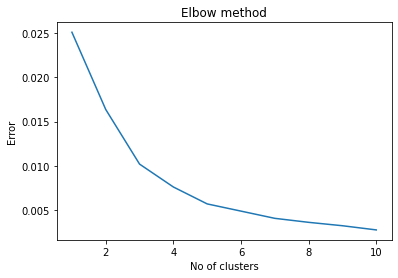

In [0]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(model_scaled)
    kmeans.fit(model_scaled)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

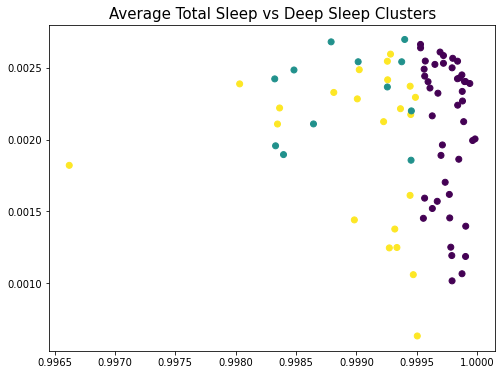

In [0]:
plt.figure(figsize=(8,6))  
plt.scatter(model_scaled['Avg Total Sleep'], model_scaled['Mins Below Sleep Lvl 60'], c=k_cluster.labels_)
plt.title('Average Total Sleep vs Deep Sleep Clusters', fontsize=15);

The graph above shows that most of the data circles around each other in 2-Dimensions but we can try and see if the data has a more non-linear interaction.

## Principal Component Analysis clustering 

Principal Component Analysis is another type of unsuprvised machine learning which can be used to visualize data in a higher dimension. But PCA uses linear projections to make low-dimensional clusters.

In [0]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
pca_result = pca.fit_transform(model_scaled)

In [0]:
eVectors = pca.components_
eVectors[2,]

array([-0.00691513, -0.008556  ,  0.84711025,  0.50741078, -0.11662683,
       -0.10590411])

So using PCD from sklearn , I create the components I need for my clustering.

In [0]:
model_scaled.columns

Index(['Mins Below Sleep Lvl 60', 'Avg Total Sleep',
       'Overall sleep quality begin', 'Overall sleep quality end', 'Epworth',
       'Groningen'],
      dtype='object')

This code will take the 4 Pca components I created from my model_scaled df and show the variance between them.

In [0]:
pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])

pca_df['pca1'] = pca_result[:,0]
pca_df['pca2'] = pca_result[:,1]
pca_df['pca3'] = pca_result[:,2]
pca_df['pca4'] = pca_result[:,3]

print('Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))

Variance explained per principal component: [0.57722534 0.38510149 0.03090211 0.00595254]


In [0]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
clusterNums = pd.Series(cluster.fit_predict(model_scaled))

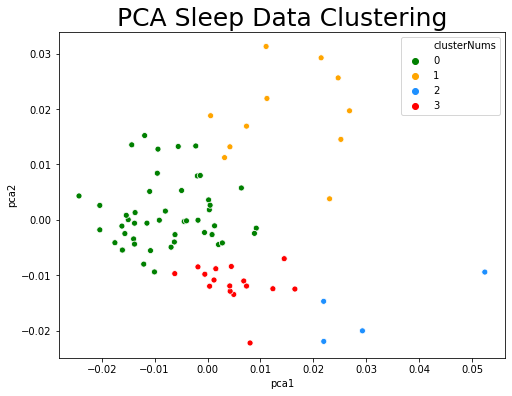

In [0]:
top_two_comp = pca_df[['pca1','pca2']]
comp_DF = pd.concat([top_two_comp, clusterNums],axis=1)
comp_DF.columns = ['pca1','pca2','clusterNums']

plt.figure(figsize=[8,6])
g =sns.scatterplot(x="pca1", y="pca2", hue="clusterNums", data=comp_DF,palette=['green','orange','dodgerblue','red'])
plt.title('PCA Sleep Data Clustering', fontsize=25);

This scatterplot of my data is made in a non-linear space, which shows how my sleep data clusters outside of 2 dimensions. 

## t-SNE clustering

t-SNE like PCA , uses relations between points to create low-dimensional mapping.Unlike PCA it uses gaussian distribution (which shows the mean of the datas distribution) so it can link non-linear correlations in data. 

In [0]:
from sklearn.manifold import TSNE

comp_tsne = TSNE(random_state=123).fit_transform(model_scaled)

First, I need to transform my data so that it can be plotted along 2 dimensions 

In [0]:
tsne_DF = pd.concat([pd.DataFrame(comp_tsne), clusterNums],axis=1)
tsne_DF.columns = ['dim1','dim2','clusterNums']
tsne_DF.head()

,dim1,dim2,clusterNums
0,-60.353527,11.661450,1
1,-46.731403,74.691437,1
2,-4.305829,28.534742,3
3,-31.514971,46.322063,3
4,-18.946953,-2.017460,0


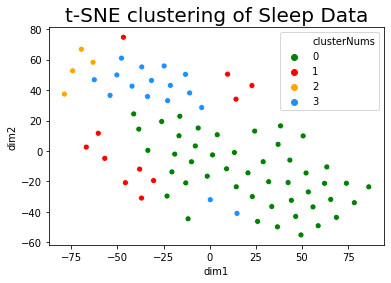

In [0]:
sns.scatterplot(x="dim1", y="dim2", hue="clusterNums", data=tsne_DF,palette=['green','red','orange','dodgerblue'])
plt.title('t-SNE clustering of Sleep Data',fontsize=20);

So the graph above shows that my data plotted using tSNE doesnt have much variations.This means that most people who particiated in this sleep research most likely fall into the same clusters.

## Distribution of Gender among tSNE clusters 

In [0]:
tsne_DF1 = pd.concat([tsne_DF,cdf['Gender']],axis=1)
df_gender = tsne_DF1.groupby(['clusterNums','Gender']).size().unstack(level= -1).reset_index()
df_gender.head()

Gender,clusterNums,Female,Male
0,0,13.0,34.0
1,1,1.0,10.0
2,2,NaN,4.0
3,3,2.0,14.0


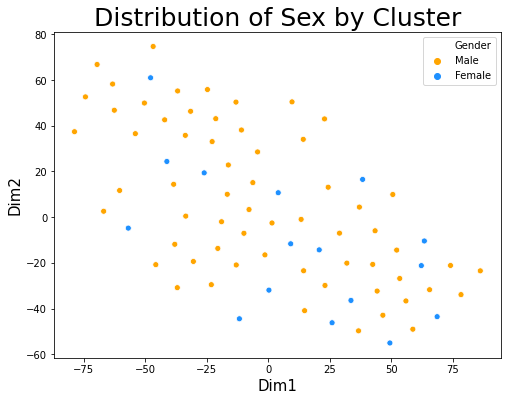

In [0]:
plt.figure(figsize=[8,6])
sns.scatterplot(x="dim1", y="dim2", hue="Gender", data=tsne_DF1,palette=['orange','dodgerblue'])
plt.ylabel('Dim2',fontsize=15)
plt.xlabel('Dim1',fontsize=15)
plt.title('Distribution of Sex by Cluster', fontsize=25);

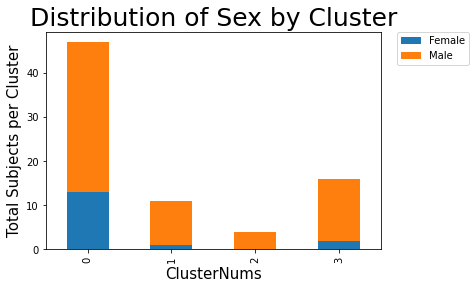

In [0]:
df_gender.plot.bar(x='clusterNums', stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.ylabel('Total Subjects per Cluster', fontsize=15)
plt.xlabel('ClusterNums', fontsize=15)
plt.title('Distribution of Sex by Cluster', fontsize=25);

The graphs above show the distribution of sex by cluster showing that the most females fell into cluster 0.

## Distribution of Age in tSNE clusters

In [0]:
tsne_DF2 = pd.concat([tsne_DF,cdf['Age']], axis=1)
df_age = tsne_DF2.groupby(['clusterNums','Age']).size().unstack(level= -1).reset_index()
df_age.head()

Age,clusterNums,18 to 24,25 to 34,35 to 44,45 to 54,55 to 64
0,0,2.0,7.0,11.0,20.0,7.0
1,1,NaN,4.0,3.0,4.0,NaN
2,2,NaN,NaN,2.0,1.0,1.0
3,3,NaN,3.0,7.0,5.0,1.0


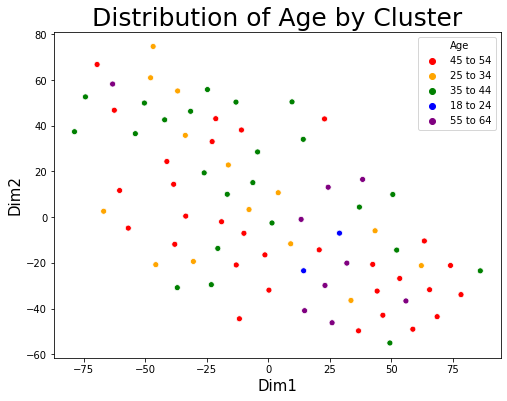

In [0]:
plt.figure(figsize=[8,6])
sns.scatterplot(x="dim1", y="dim2", hue="Age", data=tsne_DF2,palette=['red','orange','green','blue','purple'])
plt.ylabel('Dim2',fontsize=15)
plt.xlabel('Dim1',fontsize=15)
plt.title('Distribution of Age by Cluster', fontsize=25);

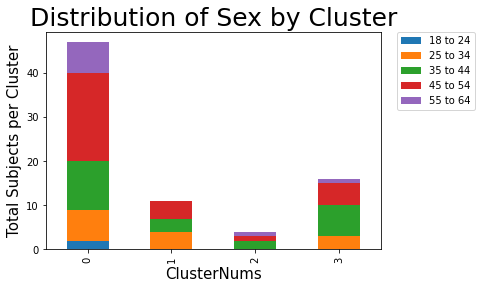

In [0]:
df_age.plot.bar(x='clusterNums', stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.ylabel('Total Subjects per Cluster', fontsize=15)
plt.xlabel('ClusterNums', fontsize=15)
plt.title('Distribution of Sex by Cluster', fontsize=25);

The graphs above shows the distribution of age groups between the 4 clusters, showing that a majority of patients age 45-54 fell into cluster 0. 

## Final Thoughts 

After taking the data exploring, analyzing, and cleaning for cluster graphs I was able to find the distribution of demographics amongst clusters and show that the data clusters better in non-linear dimensions. For further analysis it would be interesting to see if data could be collect with a even gender demographics to see if clusters would correlate more between male and female. Also taking the sleep data and seeing how it relates to the reported sleep data and see if there is any differences.